# STUDI KASUS - KELOMPOK 4 

Sebuah Pabrik elektronik berhasil mencapai **permintaan terbesar** sebanyak **5000** barang/hari. Namun pernah pabrik tersebut hanya mencapai **permintaan barang** sebanyak **1000** barang/hari.
**Persediaan barang** di gudang dapat mencapai titik **tertinggi yaitu 600** barang/hari dan **titik terendah 100** barang/hari.
Dengan keterbatasannya, pabrik tersebut dapat **memproduksi barang** **maksimum 7000** barang/hari dan **minimalnya 2000** barang/hari. 


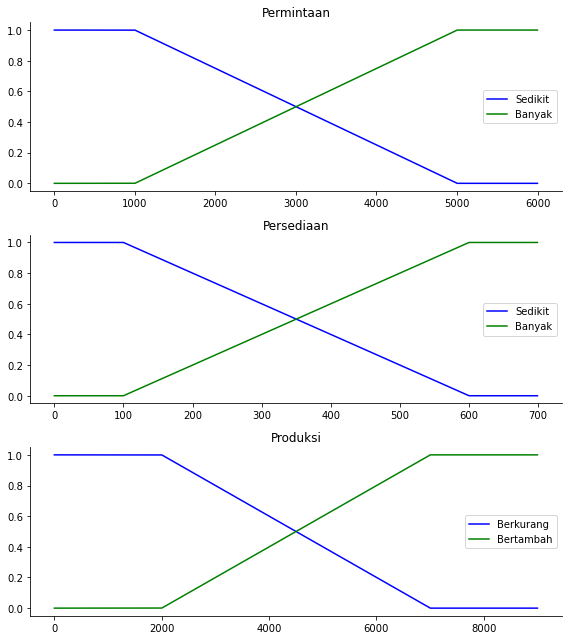

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
%matplotlib inline

#variabel
x_minta = np.arange(0, 6000, 1)
x_sedia = np.arange(0, 700, 1)
x_produksi  = np.arange(0, 9000, 1)

# keanggotaan fuzzy
minta_lo = fuzz.trapmf(x_minta, [0, 0, 1000, 5000])
minta_hi = fuzz.trapmf(x_minta, [1000, 5000, 6000, 6000])

sedia_lo = fuzz.trapmf(x_sedia, [0, 0, 100, 600])
sedia_hi = fuzz.trapmf(x_sedia, [100, 600, 700, 700])

produksi_min  = fuzz.trapmf(x_produksi, [0, 0, 2000, 7000])
produksi_plus  = fuzz.trapmf(x_produksi, [2000, 7000, 9000, 9000])


# Visualisasi kurva trapesium
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

ax0.plot(x_minta, minta_lo, 'b', linewidth=1.5, label='Sedikit')
ax0.plot(x_minta, minta_hi, 'g', linewidth=1.5, label='Banyak')

ax0.set_title('Permintaan')
ax0.legend()

ax1.plot(x_sedia, sedia_lo, 'b', linewidth=1.5, label='Sedikit')
ax1.plot(x_sedia, sedia_hi, 'g', linewidth=1.5, label='Banyak')


ax1.set_title('Persediaan')
ax1.legend()

ax2.plot(x_produksi, produksi_min, 'b', linewidth=1.5, label='Berkurang')
ax2.plot(x_produksi, produksi_plus, 'g', linewidth=1.5, label='Bertambah')

ax2.set_title('Produksi')
ax2.legend()


for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

Berapa barang elektrokik yang harus diproduksi jika jumlah permintaan sebanyak 4000 barang dan persedian di gudang masih 300 barang

In [2]:
# Input
minta = 4000
sedia = 300

# 1.FUZIFIKASI

In [3]:
#Tsukamoto
in1 = []
in1.append(fuzz.interp_membership(x_minta, minta_lo, minta))
in1.append(fuzz.interp_membership(x_minta, minta_hi, minta))
in2 = []
in2.append(fuzz.interp_membership(x_sedia, sedia_lo, sedia))
in2.append(fuzz.interp_membership(x_sedia, sedia_hi, sedia))


print("Derajat Kranggotaan Permintaan")
if in2[0]>0 :
    print("Sedikit : "+str(in1[0]))
if in2[1]>0 :
    print("Banyak  : "+ str(in1[1]))
print("")
print("Derajat Kranggotaan Persediaan ")
if in1[0]>0 :
    print("Sedikit : "+str(in2[0]))
if in1[1]>0 :
    print("Banyak  : "+ str(in2[1]))



Derajat Kranggotaan Permintaan
Sedikit : 0.25
Banyak  : 0.75

Derajat Kranggotaan Persediaan 
Sedikit : 0.6
Banyak  : 0.4


# 2. PEMBENTUKAN RULE

1. IF permintaan **BANYAK** And persediaan **BANYAK** THEN produksi **BERTAMBAH**
2. IF permintaan **SEDIKIT** And persediaan **SEDIKIT** THEN produksi **BERKURANG**
3. IF permintaan **SEDIKIT** And persediaan **BANYAK** THEN produksi **BERKURANG**
4. IF permintaan **BANYAK** And persediaan **SEDIKIT** THEN produksi **BERTAMBAH**

# 3. MESIN INFERENSI

In [11]:
# krg = 7000 - (X)*5000
# tbh = 5000*X + 2000

#RULE 1
#permintaan BANYAK And persediaan BANYAK
apred1  = np.fmin(in1[1], in2[1])
#himpunan BERTAMBAH pada drafik keanggotaan variabel PRODUKSI
z1      = 5000*apred1 + 2000

#RULE 2
#permintaan SEDIKIT And persediaan SEDIKIT
apred2  = np.fmin(in1[0], in2[0])
#himpunan BERKURANG pada drafik keanggotaan variabel PRODUKSI
z2      = 7000-(apred2)*5000

#RULE 3
#permintaan SEDIKIT And persediaan BANYAK
apred3  = np.fmin(in1[0], in2[1])
#himpunan BERKURANG pada drafik keanggotaan variabel PRODUKSI
z3      = 7000-(apred3)*5000

#RULE 3
#permintaan SEDIKIT And persediaan BANYAK
apred4  = np.fmin(in1[1], in2[0])
#himpunan BERTAMBAH pada drafik keanggotaan variabel PRODUKSI
z4      = 5000*apred4 + 2000


print("a-predikat 1 =",apred1)
print("z1 =",  z1)
print("a-predikat 2 =",apred2)
print("z2 =",  z2)
print("a-predikat 3 =",apred3)
print("z3 =",  z3)
print("a-predikat 4 =",apred4)
print("z4 =",  z4)

a-predikat 1 = 0.4
z1 = 4000.0
a-predikat 2 = 0.25
z2 = 5750.0
a-predikat 3 = 0.25
z3 = 5750.0
a-predikat 4 = 0.6
z4 = 5000.0


# 4. DEFUZIFIKASI

In [12]:
#metode rata-rata
z = (apred1*z1 + apred2*z2 + apred3*z3 + apred4*z4)/ (apred1 + apred2+ apred3 + apred4)
print("Barang yang harus di produksi : "+str(int(z)))

Barang yang harus di produksi : 4983
